In [1]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
sp = pd.read_csv('StudentsPerformance.csv')

In [3]:
sp.head()

,gender,group,parentEdu,lunch,testPreparation_course,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
sp.describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                    1000 non-null object
group                     1000 non-null object
parentEdu                 1000 non-null object
lunch                     1000 non-null object
testPreparation_course    1000 non-null object
mathScore                 1000 non-null int64
readingScore              1000 non-null int64
writingScore              1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [6]:
sp.shape

(1000, 8)

In [7]:
#adding the three scores to get the total score
sp['TotalScore'] = sp['mathScore'] + sp['readingScore'] + sp['writingScore']

In [8]:
#getting the overall percentage score of each student
sp['percentageScore'] = (sp['TotalScore'] / 300) * 100

In [9]:
sp.head()

,gender,group,parentEdu,lunch,testPreparation_course,mathScore,readingScore,writingScore,TotalScore,percentageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [10]:
#categorizing the percentage score
def category(percentageScore):
    if percentageScore <39:
        return 'F'
    elif percentageScore >= 40 and percentageScore <= 49:
        return 'D'
    elif percentageScore > 49 and percentageScore <=59:
        return 'C'
    elif percentageScore > 59 and percentageScore <= 69:
        return 'B'
    elif percentageScore > 69:
        return 'A'
    
sp['StudentsGrade']=sp['percentageScore'].apply(category)

In [11]:
sp.head(20)

,gender,group,parentEdu,lunch,testPreparation_course,mathScore,readingScore,writingScore,TotalScore,percentageScore,StudentsGrade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,A
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,C
4,male,group C,some college,standard,none,76,78,75,229,76.333333,A
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333,A
6,female,group B,some college,standard,completed,88,95,92,275,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667,D
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000,B
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333,C


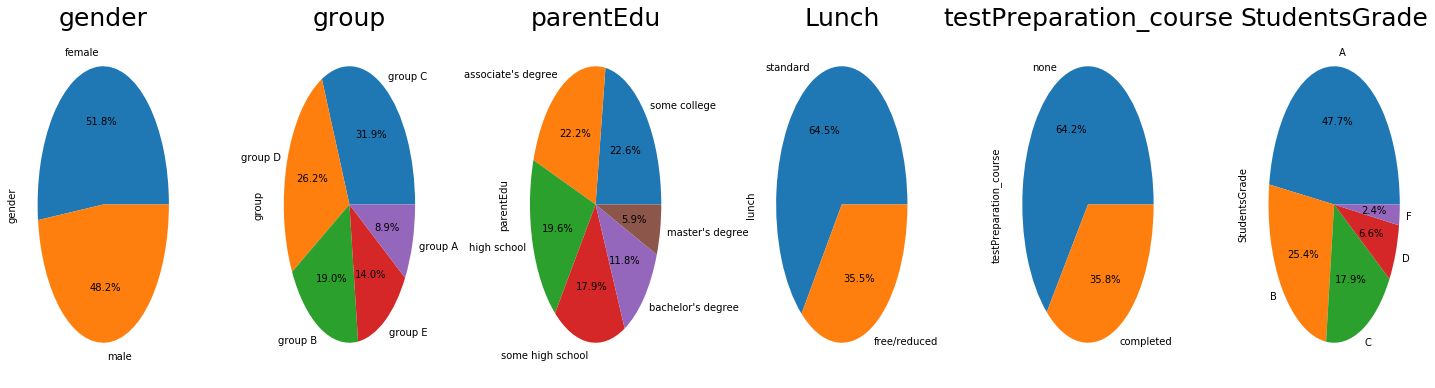

In [12]:
#univariant analysis
plt.figure(figsize=(25,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.1)

plt.subplot(161)
plt.title('gender',fontsize = 25)
sp['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(162)
plt.title('group',fontsize = 25)
sp['group'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(163)
plt.title('parentEdu',fontsize = 25)
sp['parentEdu'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(164)
plt.title('Lunch',fontsize = 25)
sp['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(165)
plt.title('testPreparation_course',fontsize = 25)
sp['testPreparation_course'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(166)
plt.title('StudentsGrade',fontsize = 25)
sp['StudentsGrade'].value_counts().plot.pie(autopct="%1.1f%%")



plt.show()

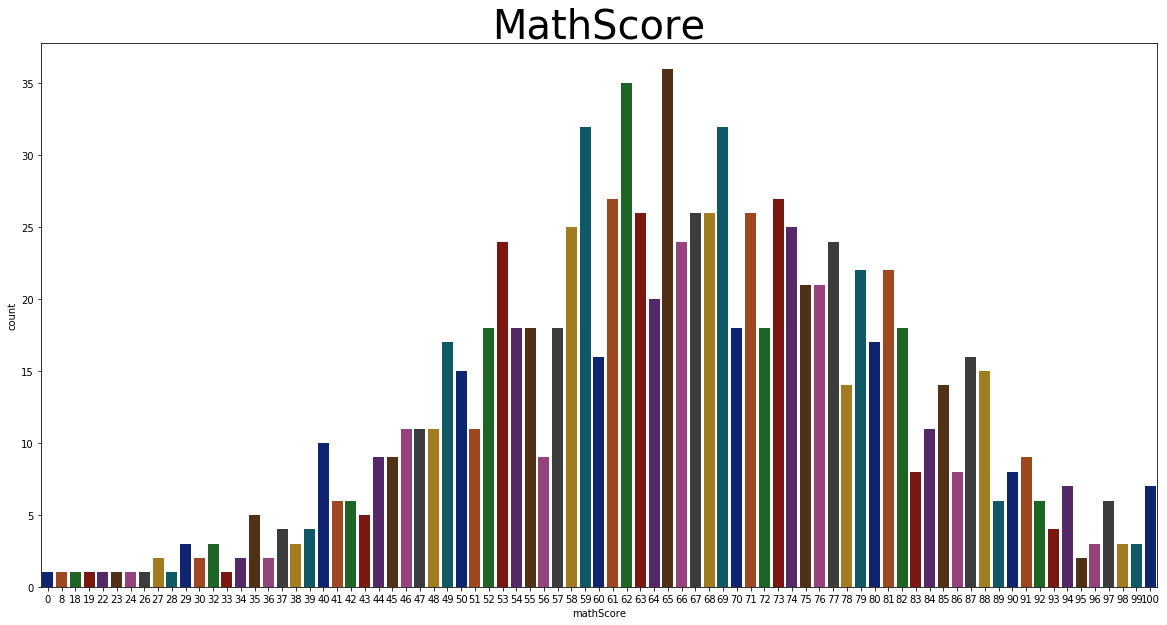

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(sp['mathScore'], palette = 'dark')
plt.title('MathScore',fontsize = 40)
plt.show()

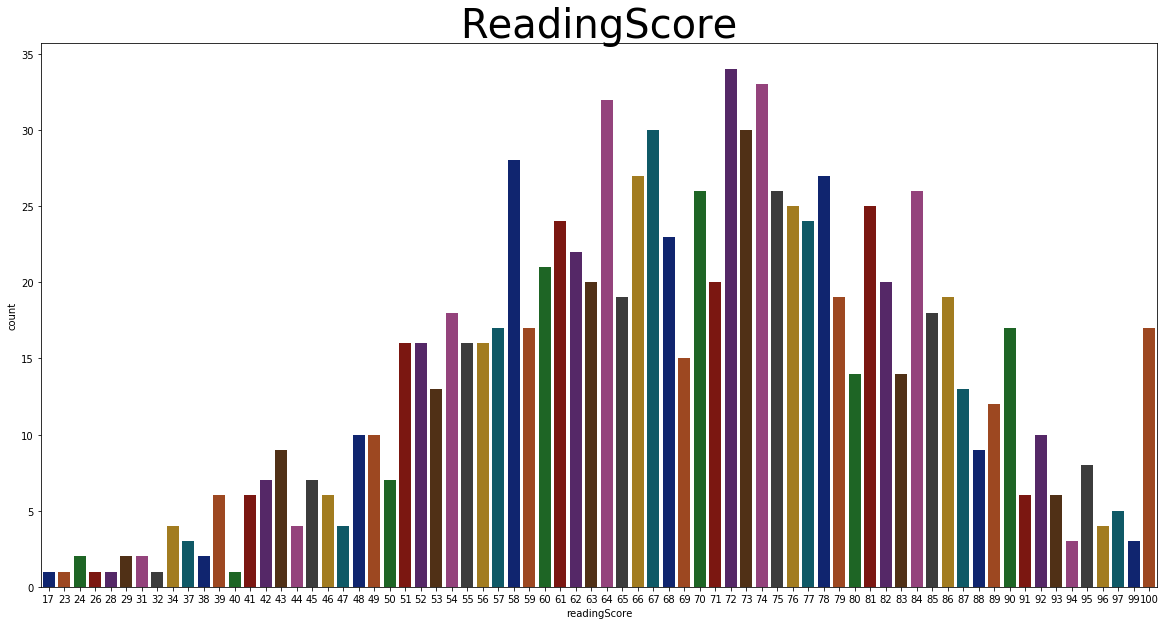

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(sp['readingScore'], palette = 'dark')
plt.title('ReadingScore',fontsize = 40)
plt.show()

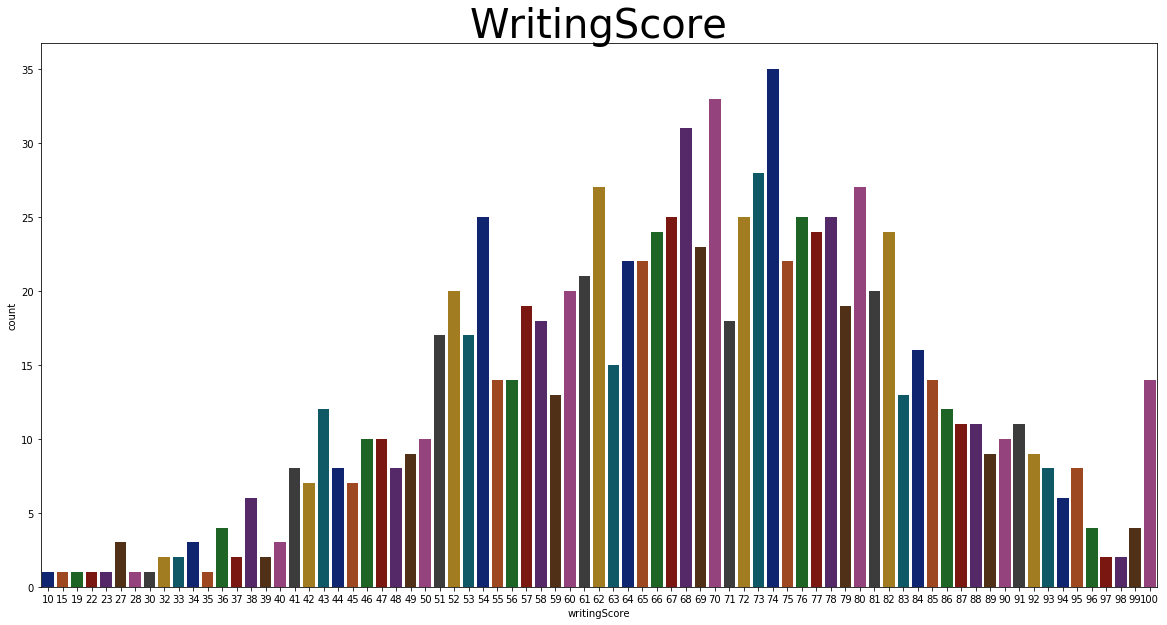

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(sp['writingScore'], palette = 'dark')
plt.title('WritingScore',fontsize = 40)
plt.show()

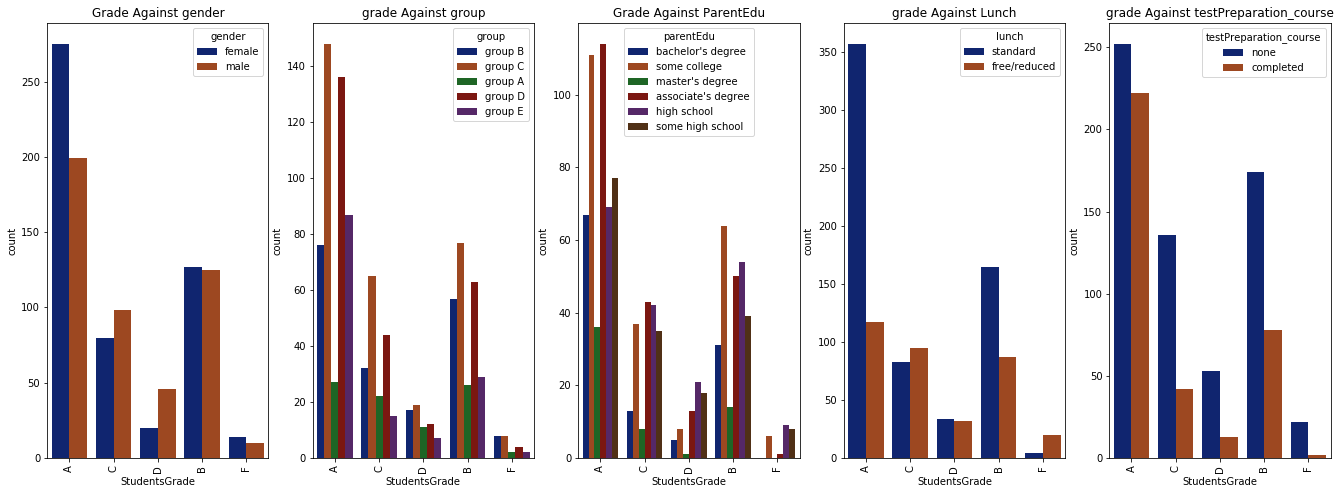

In [16]:
#multivariant analysis
plt.figure(figsize=(23,8))

plt.subplot(1,5,1)
sns.countplot(x = "StudentsGrade" ,hue="gender" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("Grade Against gender")

plt.subplot(1,5,2)
sns.countplot(x = "StudentsGrade" ,hue="group" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("grade Against group")

plt.subplot(1,5,3)
sns.countplot(x = "StudentsGrade" ,hue="parentEdu" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("Grade Against ParentEdu")

plt.subplot(1,5,4)
sns.countplot(x = "StudentsGrade" ,hue="lunch" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("grade Against Lunch")

plt.subplot(1,5,5)
sns.countplot(x = "StudentsGrade" ,hue="testPreparation_course" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("grade Against testPreparation_course")


plt.show()

Text(0.5,1,'group Against testPreparation_course')

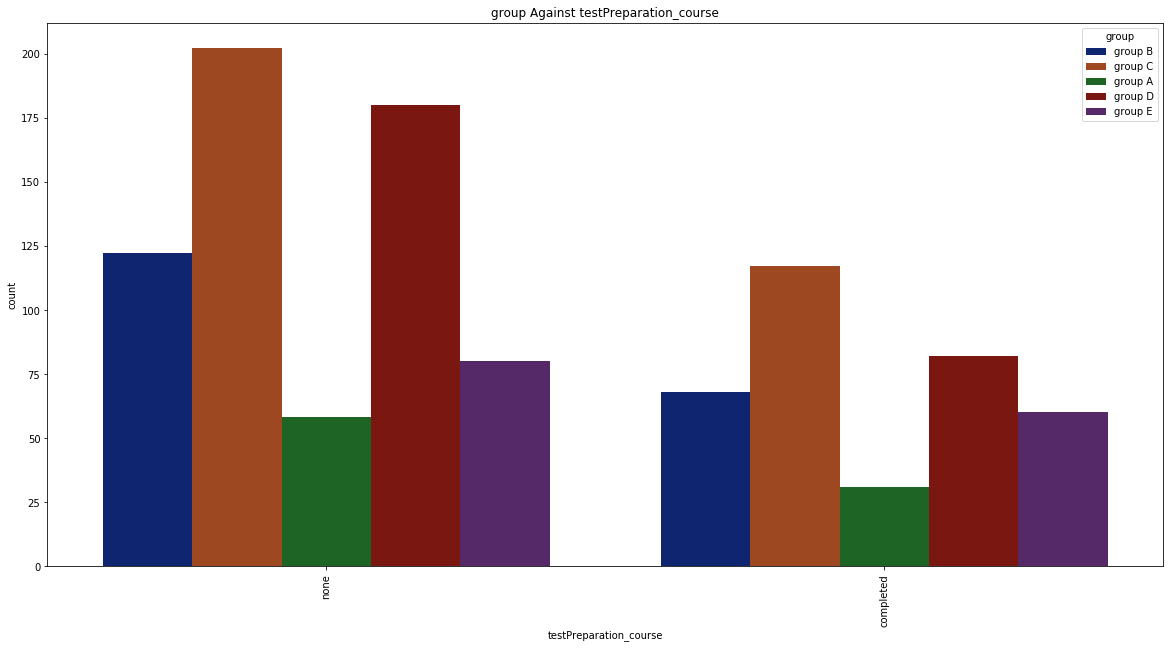

In [17]:
#checking how each group responded to the test preparation course
plt.subplot(1,1,1)
sns.countplot(x = "testPreparation_course" ,hue="group" , data=sp ,palette="dark")
plt.xticks(rotation=90)
plt.title("group Against testPreparation_course")